In [1]:
import os
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

In [2]:
seed_list = [7, 14, 21]
dataset_list = [2, 12, 32, 100]
source_list = [12, 32, 100]
sample_list = [64, 256, 1024, 4096, 16384, 32768]
w_list = ['wpca', 'w0', 'w1']
aux_list = ['aux', 'aux0', 'aux1']
isi_list = ['isi', 'isi0', 'isi1']

datadir = '/Users/xli77/Documents/MISA/MISA-data/torch'
loss_mat = np.zeros([len(dataset_list), len(source_list), len(sample_list), len(seed_list), len(w_list) ])

for i, n_dataset in enumerate(dataset_list):
    for j, n_source in enumerate(source_list):
        if (n_dataset==32 and n_source==100) or (n_dataset==100 and n_source==32) or (n_dataset==100 and n_source==100):
            continue
        for k, n_sample in enumerate(sample_list):
            if (n_source > n_sample) or (n_dataset > n_sample):
                continue
            for m, w in enumerate(w_list):
                for n, seed in enumerate(seed_list):
                    datapath=os.path.join(datadir, f'out-siva_dataset{n_dataset}_source{n_source}_sample{n_sample}_seed{seed}_{w}')
                    loss_mat[i,j,k,m,n]=float(sio.loadmat(datapath)[aux_list[m]][1,0])

In [3]:
loss_py=np.load("/Users/xli77/Documents/MISA-pytorch/run/checkpoints/sim-siva/misa_mat_sim-siva_loss_all.npy")

In [5]:
valid_ind = loss_py.flatten()!=0
loss_py_valid = loss_py.flatten()[valid_ind]
loss_mat_valid = loss_mat.flatten()[valid_ind]

Text(0.5, 1.0, 'Loss')

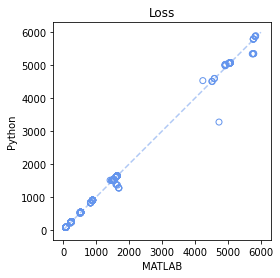

In [20]:
plt.plot(range(6000),range(6000),'--',c='cornflowerblue',alpha=0.5)
plt.scatter(loss_mat_valid,loss_py_valid,edgecolors='cornflowerblue',facecolors='none',marker='o')
plt.axis('square')
plt.xlabel("MATLAB")
plt.ylabel("Python")
plt.title("Loss")